<a href="https://colab.research.google.com/github/kamranibrahimov/NLP_disaster_prediction/blob/main/NLP_disaster_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Check for GPU

In [1]:
!nvidia-smi

Wed May 18 11:30:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    71W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Import helper functions

In [2]:
!wget https://raw.githubusercontent.com/kamranibrahimov/NLP_disaster_prediction/main/helper_functions.py

from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys


--2022-05-18 11:30:24--  https://raw.githubusercontent.com/kamranibrahimov/NLP_disaster_prediction/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10813 (11K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.56K  --.-KB/s    in 0s      

2022-05-18 11:30:24 (55.4 MB/s) - ‘helper_functions.py.1’ saved [10813/10813]



# Get a dataset

The dataset we are going to be using is Kaggle's introduction to NLP dataset (text samples Tweets labelled as disaster or not disaster).

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
unzip_data('nlp_getting_started.zip')

--2022-05-18 11:30:28--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 173.194.192.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.1’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.008s  

2022-05-18 11:30:29 (69.8 MB/s) - ‘nlp_getting_started.zip.1’ saved [607343/607343]



# Let's visualize and explore our dataset

In [4]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [9]:
for row in train[0:10].itertuples():
  _, _, _, _, text, target = row
  print(row)

Pandas(Index=0, id=1, keyword=nan, location=nan, text='Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all', target=1)
Pandas(Index=1, id=4, keyword=nan, location=nan, text='Forest fire near La Ronge Sask. Canada', target=1)
Pandas(Index=2, id=5, keyword=nan, location=nan, text="All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected", target=1)
Pandas(Index=3, id=6, keyword=nan, location=nan, text='13,000 people receive #wildfires evacuation orders in California ', target=1)
Pandas(Index=4, id=7, keyword=nan, location=nan, text='Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ', target=1)
Pandas(Index=5, id=8, keyword=nan, location=nan, text='#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires', target=1)
Pandas(Index=6, id=10, keyword=nan, location=nan, text='#flood #disaster Heavy rain cause

In [10]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train)-5)
for row in train[['text', 'target']][random_index:random_index+5].itertuples():
  _, text, target = row
  print(text)
  print(f'Target:{target}')
  print("---\n")


Beyonce Is my pick for http://t.co/nnMQlz91o9 Fan Army #Beyhive http://t.co/o91f3cYy0R 77
Target:0
---

One Direction Is my pick for http://t.co/q2eBlOKeVE Fan Army #Directioners http://t.co/eNCmhz6y34 x1402
Target:0
---

5 Seconds of Summer Is my pick for http://t.co/J6WsePTXgA Fan Army #5SOSFAM http://t.co/qWgIwC9w7Z
Target:0
---

22.Beyonce Is my pick for http://t.co/thoYhrHkfJ Fan Army #Beyhive http://t.co/WvJ39a3BGM
Target:0
---

17.Beyonce Is my pick for http://t.co/thoYhrHkfJ Fan Army #Beyhive http://t.co/WvJ39a3BGM
Target:0
---



# Split data into training and validation sets


In [11]:
# Shuffle train dataset first
train = train.sample(frac=1.0)
train

,id,keyword,location,text,target
2970,4266,drowning,NaN,@HeyImBeeYT its like theres fire in my skin an...,1
1855,2667,crush,NaN,I'm my own woman crush ????,0
2468,3536,derailment,India,Trains derailment: 'It's the freakiest of frea...,1
5408,7719,panicking,NaN,@beauscoven nah man he's panicking. He just fo...,0
1004,1456,body%20bagging,NaN,WWE 2k15 MyCareer EP18 Tyrone body bagging dud...,0
...,...,...,...,...,...
4680,6654,landslide,NaN,@MartinMJ22 @YouGov When did a 12 seat majorit...,1
6551,9374,survived,NaN,By the grace of GOD I survived the 2am shift a...,0
1773,2546,collision,"Denver, Colorado",Motorcyclist bicyclist injured in Denver colli...,1
852,1234,blood,NaN,Broke my nail(real not fake) this morning bloo...,0


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train['text'], train['target'], test_size = 0.1,
                                                  random_state=42)

In [13]:
X_train

18                                      My car is so fast
6729    Severe Thunderstorm Warning for Oklahoma Count...
533     driving the avalanche after having my car for ...
5261    California: Spring Oil Spill Estimate Grows: D...
4196    Choking Hazard Prompts Recall Of Kraft Cheese ...
                              ...                        
1328    2 Burning Man Tickets + Vehicle Pass - Full re...
5042    #BakeOffFriends #GBBO 'The one with the mudsli...
1027                   BODY BAGS! https://t.co/0McXc68GZD
6049    nothing surprises me anymore and i am sure the...
2527    I REALLY liked the first Hobbit movie. I saw i...
Name: text, Length: 6851, dtype: object

In [14]:
len(X_train), len(X_val), len(y_train), len(y_val)

(6851, 762, 6851, 762)

## Converting text into numbers

When dealing with a text problem, one of the first things you will have to do before you can build a model is to convert your text to numbers.

There are a few ways to do this, namely:

* Tokenization - direct mapping of token (a token could be a word or a character) to number
* Embedding - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned)


### Text vectorization (tokenization)

In [15]:
X_train

18                                      My car is so fast
6729    Severe Thunderstorm Warning for Oklahoma Count...
533     driving the avalanche after having my car for ...
5261    California: Spring Oil Spill Estimate Grows: D...
4196    Choking Hazard Prompts Recall Of Kraft Cheese ...
                              ...                        
1328    2 Burning Man Tickets + Vehicle Pass - Full re...
5042    #BakeOffFriends #GBBO 'The one with the mudsli...
1027                   BODY BAGS! https://t.co/0McXc68GZD
6049    nothing surprises me anymore and i am sure the...
2527    I REALLY liked the first Hobbit movie. I saw i...
Name: text, Length: 6851, dtype: object

In [16]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in X_train])/len(X_train))

15

In [17]:
# Create text vectorization variable

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=10000,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None,
                                    output_mode='int',
                                    output_sequence_length=15,
                                    pad_to_max_tokens=True)

In [18]:
# Fit the text vectorizer to training set
text_vectorizer.adapt(X_train)

In [19]:
# Create a sample sentence and tokenize it
sample_sentence = "There is a flood in my street"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 75,   9,   3, 202,   4,  13, 762,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [20]:
# Get the unique words in the vocabulary
vocabulary = text_vectorizer.get_vocabulary()
print(f"Top 5 words: {vocabulary[:5]}")
print(f"Bottom 5 words: {vocabulary[-5:]}")

Top 5 words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 words: ['parter', 'partake', 'parsholics', 'pars', 'parliment']


### Creating an Embedding using a Embedding Layer

To make our embedding, we are going to use Tensorflow's embedding layer.

The paramaters we care most about for our embedding layer:
* `input_dim` = the size of our vocabulary
* `output_dim` = the size of the output embedding vector, for example, a value of 100 would mean each token gets represented by a vector 100 long
* `input_length` = length of the sequences being passed to the embedding layer


In [21]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=10000,
                             output_dim=128,
                             embeddings_initializer='uniform',
                             input_length=15)

embedding

In [22]:
# Get a random sentence from train set and embed it
import random
random_sentence = random.choice(X_train)
print(f"Original sentence: {random_sentence}")
embedded_sentence = embedding(text_vectorizer(random_sentence))
print(f"Embedded sentence:{embedded_sentence.shape}")

Original sentence: The Danger and Excitement of Underwater Cave Diving http://t.co/8c3fPloxcr http://t.co/cBGZ9xuN2k
Embedded sentence:(15, 128)


In [23]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model's accuracy, precision, recall and f1 score.
  """

  # Accuracy
  accuracy = accuracy_score(y_true, y_pred) * 100

  # Precision, recall and f1-score using "weighted" average
  precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred,
                                                                   average='weighted')
  results = {"accuracy":accuracy,
             "precision":precision,
             "recall":recall,
             "f1":f1_score}

  return results

## Modeling a text dataset (running a series of experiments)

Now we've a got way to turn our text sequences into numbers, it's time start building a series of modelling experiments.

* Model 0: Naive Bayes(baseline), this is from SKlearn ML
* Model 1: Feed-forward neural network(dense model)
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectional-LSTM model (RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: TensorFlow Hub Pretrained Feature Extractor (using transfer learning for NLP)

How are we going to approach all of these?

Use the standard steps in modelling with tensorflow:
* Create a model
* Build a model
* Fit a model
* Evaluate our model



### Model 0: Getting a baseline

As with all machine learning modelling experiments, it is important to create a baseline model so you have got a benchmark for future experiments to build upon.

To create our baseline, we will use Sklearn's Multinomial Naive Bayes using the TF-IDF formula to convert our words to numbers.

>**Note:** It is common practice to use non-DL algoritmhs as a baseline because of their speed and then later using DL to see if you can improve upon them.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
                    ('tfidf', TfidfVectorizer()),
                    ('clf', MultinomialNB())
])

# Fit the pipeline
model_0.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [25]:
baseline_score = model_0.score(X_val, y_val)
print(f"Baseline score with Naive Bayes:{baseline_score*100:0.2f}%")

Baseline score with Naive Bayes:78.74%


In [26]:
model_0_pred = model_0.predict(X_val)

In [27]:
baseline_results = calculate_results(y_val, model_0_pred)
baseline_results

{'accuracy': 78.74015748031496,
 'f1': 0.7807304612622571,
 'precision': 0.8028112015461957,
 'recall': 0.7874015748031497}

## Model 1: A simple dense model

In [28]:
# Create a tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create a directory to save TensorBoard logs
SAVE_DIR = 'model_logs'

In [29]:
# Build model with Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D(name='global_avg_pool_layer')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense')

In [30]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None,)]                 0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_avg_pool_layer (Glob  (None, 128)              0         
 alAveragePooling1D)                                             
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [31]:
# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [32]:
# Fit the model
model_1_history = model_1.fit(X_train, y_train,
                              epochs=5,
                              validation_data=(X_val, y_val),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                    experiment_name='model_1_dense')])

Saving TensorBoard log files to: model_logs/model_1_dense/20220518-113033
Epoch 1/5
215/215 [==============================] - 6s 17ms/step - loss: 0.6119 - accuracy: 0.6903 - val_loss: 0.5225 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4419 - accuracy: 0.8215 - val_loss: 0.4560 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3474 - accuracy: 0.8615 - val_loss: 0.4446 - val_accuracy: 0.7861
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2849 - accuracy: 0.8914 - val_loss: 0.4506 - val_accuracy: 0.7940
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2373 - accuracy: 0.9111 - val_loss: 0.4664 - val_accuracy: 0.7808


In [33]:
model_1.evaluate(X_val, y_val)

24/24 [==============================] - 0s 7ms/step - loss: 0.4664 - accuracy: 0.7808


[0.46639755368232727, 0.7808399200439453]

In [34]:
model_1_pred = tf.round(model_1.predict(X_val))
model_1_results = calculate_results(y_val, model_1_pred)
model_1_results

{'accuracy': 78.08398950131233,
 'f1': 0.7789523147111003,
 'precision': 0.7817166172595977,
 'recall': 0.7808398950131233}

In [35]:
baseline_results

{'accuracy': 78.74015748031496,
 'f1': 0.7807304612622571,
 'precision': 0.8028112015461957,
 'recall': 0.7874015748031497}

### Model 2: LSTM

LSTM = long short term memory (one of the most popular LSTM cells)

Our structure of an RNN looks like this:
```
Input (text) -> Tokenize -> Embedding -> Layers(RNN's/Dense) -> Output (label probability)
```

In [36]:
# Create an LSTM model
input = layers.Input(shape=(), dtype=tf.string)
x = text_vectorizer(input)
x = embedding(x)
x = layers.LSTM(64)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(input,
                         outputs,
                         name='model_2_LSTM')

In [37]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [38]:
# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [39]:
# Fit the model
model_2_history = model_2.fit(X_train, y_train,
                              epochs=5,
                              validation_data=(X_val, y_val),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_2_LSTM')])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20220518-113053
Epoch 1/5
215/215 [==============================] - 9s 14ms/step - loss: 0.2240 - accuracy: 0.9193 - val_loss: 0.5814 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1603 - accuracy: 0.9432 - val_loss: 0.6722 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1265 - accuracy: 0.9523 - val_loss: 0.6971 - val_accuracy: 0.7559
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1043 - accuracy: 0.9612 - val_loss: 0.9249 - val_accuracy: 0.7467
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0868 - accuracy: 0.9667 - val_loss: 0.9338 - val_accuracy: 0.7493


In [40]:
model_2_pred = tf.round(model_2.predict(X_val))
model_2_results = calculate_results(y_val, model_2_pred)
model_2_results

{'accuracy': 74.93438320209974,
 'f1': 0.7487325236103808,
 'precision': 0.7487073843703734,
 'recall': 0.7493438320209974}

### Model 3: GRU

Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar feature to an LSTM cell but has less parameters.

In [41]:
# Build an RNN using th GRU cell
input = layers.Input(shape=(), dtype='string')
x = text_vectorizer(input)
x = embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(input, outputs, name = 'model_3_GRU')

In [42]:
# Get a summary
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None,)]                 0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [43]:
# Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [44]:
# Fit the model
model_3_history = model_3.fit(X_train, y_train,
            epochs=5,
            validation_data=(X_val, y_val),
            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                   "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20220518-113120
Epoch 1/5
215/215 [==============================] - 5s 13ms/step - loss: 0.1546 - accuracy: 0.9410 - val_loss: 0.7037 - val_accuracy: 0.7375
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0824 - accuracy: 0.9710 - val_loss: 0.8102 - val_accuracy: 0.7375
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0742 - accuracy: 0.9736 - val_loss: 0.8277 - val_accuracy: 0.7362
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0637 - accuracy: 0.9746 - val_loss: 1.0924 - val_accuracy: 0.7454
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0551 - accuracy: 0.9768 - val_loss: 0.8373 - val_accuracy: 0.7388


In [45]:
model_3_pred = tf.round(model_3.predict(X_val))
model_3_results = calculate_results(y_val, model_3_pred)
model_3_results

{'accuracy': 73.88451443569554,
 'f1': 0.736129687395503,
 'precision': 0.739200184269058,
 'recall': 0.7388451443569554}

### Model 4: Bidirectional RNN

Normal RNN's go from left to right (just like you would read an English sentence) however, a bidirectional RNN goes from right to left as well as left to right.

In [46]:
from tensorflow.keras import layers
input = layers.Input(shape=(), dtype='string')
x = text_vectorizer(input)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_4 = tf.keras.Model(input, outputs, name="model_4_bidirectional")

In [47]:
# Get a summary
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None,)]                 0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [48]:
# Compile the model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [49]:
# Fit the model
model_4_history = model_4.fit(X_train, y_train,
                              epochs=5,
                              validation_data=(X_val, y_val),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_4_bidirectional')])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20220518-113145
Epoch 1/5
215/215 [==============================] - 8s 20ms/step - loss: 0.1074 - accuracy: 0.9679 - val_loss: 0.9992 - val_accuracy: 0.7336
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0528 - accuracy: 0.9775 - val_loss: 1.1603 - val_accuracy: 0.7454
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0480 - accuracy: 0.9801 - val_loss: 1.2544 - val_accuracy: 0.7375
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0452 - accuracy: 0.9777 - val_loss: 1.3154 - val_accuracy: 0.7375
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0420 - accuracy: 0.9816 - val_loss: 1.3461 - val_accuracy: 0.7467


In [50]:
model_4_pred = tf.round(model_4.predict(X_val))
model_4_results = calculate_results(y_val, model_4_pred)
model_4_results

{'accuracy': 74.67191601049869,
 'f1': 0.7456877312136234,
 'precision': 0.7460350352106693,
 'recall': 0.7467191601049868}

## Convolution Neural Netowrks for Text (and other types of sequences)

We've used CNNs for images but images are typically 2D (height x width)... however, our text data is 1D.

Previously we've Conv2D for our image data but now we are going to use Conv1D.

The typical structure of a Conv1D model for sequences (in our case, text):

```
Inputs(text) -> Tokenization -> Embedding -> Layer(s)(typically Conv1D + pooling) -> Outputs class probabilities)
```

### Model 5: Conv1D

In [51]:
# Create 1- dimensional convolutional layer to model sequences
input = layers.Input(shape=(), dtype=tf.string)
x = text_vectorizer(input)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5,strides=1, activation='relu', padding='valid')(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_5 = tf.keras.Model(input, outputs, name='model_5_Conv1D')

In [52]:
# Get the summary
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None,)]                 0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 1)              

In [53]:
# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [54]:
# Fit the model
history_model_5 = model_5.fit(X_train, y_train,
                              epochs=5,
                              validation_data = (X_val, y_val),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'Conv1D')])

Saving TensorBoard log files to: model_logs/Conv1D/20220518-113208
Epoch 1/5
215/215 [==============================] - 3s 9ms/step - loss: 0.1210 - accuracy: 0.9610 - val_loss: 0.9202 - val_accuracy: 0.7441
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0748 - accuracy: 0.9707 - val_loss: 1.0499 - val_accuracy: 0.7283
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0623 - accuracy: 0.9772 - val_loss: 1.1511 - val_accuracy: 0.7310
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0581 - accuracy: 0.9762 - val_loss: 1.1939 - val_accuracy: 0.7362
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0519 - accuracy: 0.9780 - val_loss: 1.2582 - val_accuracy: 0.7310


In [55]:
model_5_pred = tf.round(model_5.predict(X_val))
model_5_results = calculate_results(y_val, model_5_pred)
model_5_results

{'accuracy': 73.0971128608924,
 'f1': 0.7314546991020964,
 'precision': 0.7326653633380118,
 'recall': 0.7309711286089239}

## Model 6: TensorFlow Hub Pretrained Sentence Encoder

Now we have built a few of our own models, let's try and use transfer learning for NLP, specifically using TensorFlow Hub's Universal Sentence
Encoder: https://tfhub.dev/google/universal-sentence-encoder/4

In [56]:
import tensorflow_hub as hub
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name='use')

In [57]:
# Let's create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer,
  layers.Dense(64, activation='relu'),
  layers.Dense(1, activation='sigmoid')
], name='model_6_USE')

# Compile the model
model_6.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 use (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [58]:
model_6_history = model_6.fit(X_train,
                              y_train,
                              epochs=5,
                              validation_data=(X_val, y_val),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'tf_hub_sentence_encoder')])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20220518-113224
Epoch 1/5
215/215 [==============================] - 8s 24ms/step - loss: 0.5034 - accuracy: 0.7913 - val_loss: 0.4506 - val_accuracy: 0.7874
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.4148 - accuracy: 0.8165 - val_loss: 0.4420 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 5s 23ms/step - loss: 0.4001 - accuracy: 0.8256 - val_loss: 0.4385 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 5s 21ms/step - loss: 0.3916 - accuracy: 0.8304 - val_loss: 0.4364 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 4s 20ms/step - loss: 0.3848 - accuracy: 0.8327 - val_loss: 0.4368 - val_accuracy: 0.7953


In [59]:
model_6_pred = tf.round(model_6.predict(X_val))
model_6_results = calculate_results(y_val, model_6_pred)
model_6_results

{'accuracy': 79.52755905511812,
 'f1': 0.7929535471306436,
 'precision': 0.7977455437568992,
 'recall': 0.7952755905511811}

In [60]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({'0_baseline': baseline_results,
                                  '1_simple_dense': model_1_results,
                                  '2_LSTM': model_2_results,
                                  '3_GRU': model_3_results,
                                  '4_bidirectional':model_4_results,
                                  '5_conv1d': model_5_results,
                                  '6_tf_hub_use_encoder':model_6_results})
all_model_results = all_model_results.T
# Reduce the accuracy to the same scale as other metrics
all_model_results['accuracy'] = all_model_results["accuracy"]/100

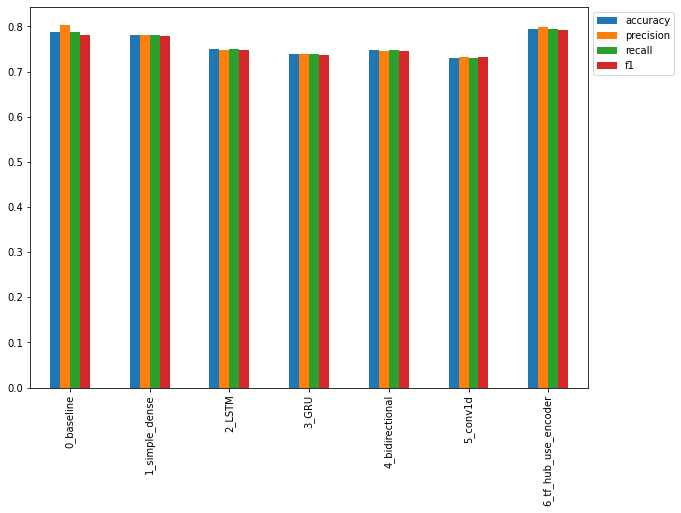

In [61]:
# Plot and compare all of the model results
all_model_results.plot(kind='bar', figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))